## IMPLEMENTATION OF MULTI-ARM BANDIT USING     REINFORCEMENT LEARNING

## Importing packages

In [158]:
import numpy as np                  #for working in domain of linear algebra, fourier transform, and matrices
import pandas as pd                 #for data wrangling and analysis
import matplotlib.pyplot as plt     #for 2D graphics

### BANDIT class

In [159]:
# lr=learning rate
# ucb= upper confidence bound
# exp rate = exploration rate
# k = No. of bandit arms

In [160]:
class Bandit:
    def __init__(self, k=10, exp_rate=0.3, lr=0.1, ucb=False, seed=None, c=2): #initializing all the required elements
        self.k = k
        self.actions = range(self.k)
        self.exp_rate = exp_rate
        self.lr = lr
        self.total_reward = 0
        self.avg_reward = []
        
        self.TrueValue = []
        np.random.seed(seed)
        for i in range(self.k):
            self.TrueValue.append(np.random.randn()+2)  # normal distribution
        
        self.values = np.zeros(self.k)
        # for ucb
        self.times = 0                          # counts the total number of trials 
        self.action_times = np.zeros(self.k)    # counts the number of actions for each bandit.
        
        self.ucb = ucb  # if select action using upper-confidence-bound
        self.c = c
    def chooseAction(self): #funtion for choosing the action
        # explore
        if np.random.uniform(0, 1) <= self.exp_rate:  
            action = np.random.choice(self.actions)
        else:
            # exploit
            if self.ucb:
                if self.times == 0:
                    action = np.random.choice(self.actions)
                else:
                    confidence_bound = self.values + self.c*np.sqrt(np.log(self.times)/(self.action_times+0.1))  # c=2
                    action = np.argmax(confidence_bound)
            else:
                action = np.argmax(self.values)
        return action
    
    def takeAction(self, action):
        self.times += 1
        self.action_times[action] += 1 # take action and update value estimates
        reward = np.random.randn() + self.TrueValue[action]  # add randomness to reward
        # using incremental method to propagate
        self.values[action] += self.lr * (reward - self.values[action]) 
        
        self.total_reward += reward
        self.avg_reward.append(self.total_reward/self.times)
    def play(self, n):
        for _ in range(n):
            action = self.chooseAction()
            self.takeAction(action)
        

In [161]:
bdt = Bandit(k=5)  # No. of bandit arms
bdt.play(2000)     # No. of iterations

        

In [162]:
print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

Estimated values [0.26741078 2.40682596 1.82253124 2.79107156 3.39597288]
Actual values [0.4318729667469319, 2.856160853023741, 1.893410951078076, 2.7601022984785466, 3.2489815252893313]


Text(0, 0.5, 'avg reward')

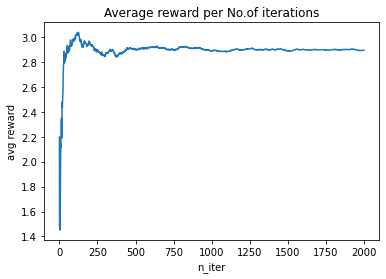

In [163]:
plt.plot(bdt.avg_reward)
plt.title("Average reward per No.of iterations")
plt.xlabel("n_iter")
plt.ylabel("avg reward")

## Action value methods :
#### 1. Epsilon-Greedy 
#### 2. UCB


### 1.Epsilon-Greedy using different exploration rates :

In [164]:
#Using Epsilon-Greedy to maintain good balance between exploration and exploitation.
bdt = Bandit(k=5, exp_rate=0.1, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward1 = bdt.avg_reward

Estimated values [2.6600613  0.65143855 3.80596176 2.25201666 1.16469527]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [165]:
bdt = Bandit(k=5, exp_rate=0.3, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward2 = bdt.avg_reward

Estimated values [2.54927187 0.84413741 3.34851036 1.89580542 1.56265398]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [166]:
bdt = Bandit(k=5, exp_rate=0.5, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward3 = bdt.avg_reward

Estimated values [2.4103916  0.74177782 3.72447611 1.49605192 1.08691117]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


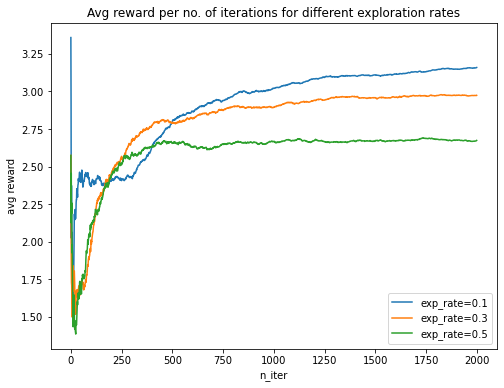

In [167]:
plt.figure(figsize=[8, 6])
plt.plot(avg_reward1, label="exp_rate=0.1")
plt.plot(avg_reward2, label="exp_rate=0.3")
plt.plot(avg_reward3, label="exp_rate=0.5")
plt.title("Avg reward per no. of iterations for different exploration rates")
plt.xlabel("n_iter")
plt.ylabel("avg reward")
plt.legend()

###### From the above graph , exploration rate =0.1 did better 

# 2.UCB : 
Upper Confidence Bound (UCB) is a algorithm that overcomes all of the limitations of strategies based on exploration followed by commitment, including the need to know the horizon and sub-optimality gaps

In [168]:
# UCB is based on the principle of optimism in the face of uncertainty 

bdt = Bandit(k=5, exp_rate=0.1, seed=1234, ucb=True, c=2)
bdt.play(2000)
print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)
avg_reward4 = bdt.avg_reward


Estimated values [2.55646074 0.65063447 3.80596236 2.20346295 1.16551876]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [169]:
bdt = Bandit(k=5, exp_rate=0.1, seed=1234, ucb=True, c=5)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward5 = bdt.avg_reward


Estimated values [2.36562833 0.65999917 3.80596156 2.06576659 1.14479614]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [170]:
bdt = Bandit(k=5, exp_rate=0.1, seed=1234, ucb=True, c=7)
bdt.play(2000)
print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)
avg_reward6 = bdt.avg_reward

Estimated values [2.29530879 0.64741153 3.8059668  1.85024041 1.16204113]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


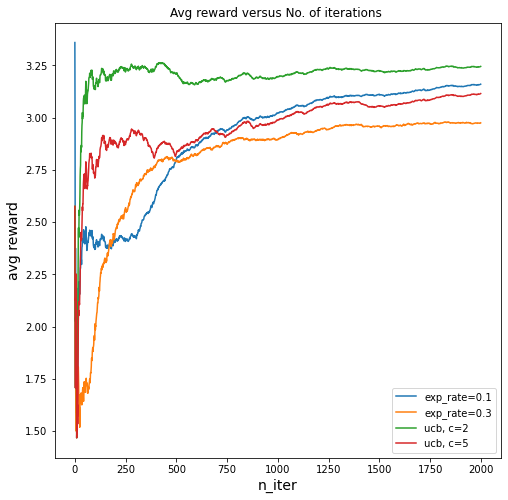

In [171]:
plt.figure(figsize=[8,8])
plt.plot(avg_reward1, label="exp_rate=0.1") #exploration rate=0.1
plt.plot(avg_reward2, label="exp_rate=0.3") #exploration rate=0.3
#plt.plot(avg_reward3, label="exp_rate=0.5") #exploration rate=0.5
plt.plot(avg_reward4, label="ucb, c=2")
plt.plot(avg_reward5, label="ucb, c=5")
plt.title("Avg reward versus No. of iterations ")
plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()

###### UCB with c=2 did better than the others from the above plot and outperformed epsilon greedy